In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# libraries required
import pandas as pd
import numpy as np
# Matplotlib visualization
import matplotlib.pyplot as plt
# Seaborn for visualization
import seaborn as sns
import statsmodels.api as sm
from numpy.core.numeric import NaN
import warnings
warnings.simplefilter('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Read in data into a dataframe 
dfeature= pd.read_csv('/content/drive/My Drive/tox21_global_cdf_rdkit.csv')
df = pd.read_csv('/content/drive/My Drive/tox21.csv')


In [4]:
#show all of rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [5]:
# shape of dataset
print(dfeature.shape)
print(df.shape)

(7831, 201)
(7831, 13)


In [6]:
df= df.drop('smiles', axis= 1)
df.head()


,NR-AR,NR-AR-LBD,NR-AhR,NR-Aromatase,NR-ER,NR-ER-LBD,NR-PPAR-gamma,SR-ARE,SR-ATAD5,SR-HSE,SR-MMP,SR-p53
0,0.0,0.0,1.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Function to calculate missing values by column
def values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        ones=df.sum()
        zeros=7832-(mis_val+ones)
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([ones,zeros,mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {2 : 'Missing Values', 3 : '% of Total Missing Values',0:'One labeled data',1:'Zero labeled data'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        'One labeled data', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns



In [8]:
 values_table(df)

Your selected dataframe has 12 columns.
There are 12 columns that have missing values.


,One labeled data,Zero labeled data,Missing Values,% of Total Missing Values
SR-ARE,942.0,4891.0,1999,25.5
SR-MMP,918.0,4893.0,2021,25.8
NR-ER,793.0,5401.0,1638,20.9
NR-AhR,768.0,5782.0,1282,16.4
SR-p53,423.0,6352.0,1057,13.5
SR-HSE,372.0,6096.0,1364,17.4
NR-ER-LBD,350.0,6606.0,876,11.2
NR-AR,309.0,6957.0,566,7.2
NR-Aromatase,300.0,5522.0,2010,25.7
SR-ATAD5,264.0,6809.0,759,9.7


In [9]:
dlabel= pd.read_csv('/content/drive/My Drive/tox21label.csv') #this file contains smiles and 'SR-ARE' label

data0=pd.concat([dfeature,dlabel],axis=1)
data1 = data0.iloc[:,1:]
dataf= data1.dropna(how='any')#data was cleaned


xdata = dataf.iloc[:,:-2] #features
ydata = dataf.iloc[:,-2:] # smile & target label
ydata=pd.DataFrame(ydata)
xdata

In [19]:
from sklearn.model_selection import train_test_split

X_trainingdata, X_test, y_trainingdata, y_test =train_test_split(xdata,ydata, stratify=ydata['SR-ARE'],test_size=0.10)


In [20]:
X_trainingdata.describe()


,"('BalabanJ', <class 'numpy.float64'>)","('BertzCT', <class 'numpy.float64'>)","('Chi0', <class 'numpy.float64'>)","('Chi0n', <class 'numpy.float64'>)","('Chi0v', <class 'numpy.float64'>)","('Chi1', <class 'numpy.float64'>)","('Chi1n', <class 'numpy.float64'>)","('Chi1v', <class 'numpy.float64'>)","('Chi2n', <class 'numpy.float64'>)","('Chi2v', <class 'numpy.float64'>)","('Chi3n', <class 'numpy.float64'>)","('Chi3v', <class 'numpy.float64'>)","('Chi4n', <class 'numpy.float64'>)","('Chi4v', <class 'numpy.float64'>)","('EState_VSA1', <class 'numpy.float64'>)","('EState_VSA10', <class 'numpy.float64'>)","('EState_VSA11', <class 'numpy.float64'>)","('EState_VSA2', <class 'numpy.float64'>)","('EState_VSA3', <class 'numpy.float64'>)","('EState_VSA4', <class 'numpy.float64'>)","('EState_VSA5', <class 'numpy.float64'>)","('EState_VSA6', <class 'numpy.float64'>)","('EState_VSA7', <class 'numpy.float64'>)","('EState_VSA8', <class 'numpy.float64'>)","('EState_VSA9', <class 'numpy.float64'>)","('ExactMolWt', <class 'numpy.float64'>)","('FpDensityMorgan1', <class 'numpy.float64'>)","('FpDensityMorgan2', <class 'numpy.float64'>)","('FpDensityMorgan3', <class 'numpy.float64'>)","('FractionCSP3', <class 'numpy.float64'>)","('HallKierAlpha', <class 'numpy.float64'>)","('HeavyAtomCount', <class 'numpy.float64'>)","('HeavyAtomMolWt', <class 'numpy.float64'>)","('Ipc', <class 'numpy.float64'>)","('Kappa1', <class 'numpy.float64'>)","('Kappa2', <class 'numpy.float64'>)","('Kappa3', <class 'numpy.float64'>)","('LabuteASA', <class 'numpy.float64'>)","('MaxAbsEStateIndex', <class 'numpy.float64'>)","('MaxAbsPartialCharge', <class 'numpy.float64'>)","('MaxEStateIndex', <class 'numpy.float64'>)","('MaxPartialCharge', <class 'numpy.float64'>)","('MinAbsEStateIndex', <class 'numpy.float64'>)","('MinAbsPartialCharge', <class 'numpy.float64'>)","('MinEStateIndex', <class 'numpy.float64'>)","('MinPartialCharge', <class 'numpy.float64'>)","('MolLogP', <class 'numpy.float64'>)","('MolMR', <class 'numpy.float64'>)","('MolWt', <class 'numpy.float64'>)","('NHOHCount', <class 'numpy.float64'>)","('NOCount', <class 'numpy.float64'>)","('NumAliphaticCarbocycles', <class 'numpy.float64'>)","('NumAliphaticHeterocycles', <class 'numpy.float64'>)","('NumAliphaticRings', <class 'numpy.float64'>)","('NumAromaticCarbocycles', <class 'numpy.float64'>)","('NumAromaticHeterocycles', <class 'numpy.float64'>)","('NumAromaticRings', <class 'numpy.float64'>)","('NumHAcceptors', <class 'numpy.float64'>)","('NumHDonors', <class 'numpy.float64'>)","('NumHeteroatoms', <class 'numpy.float64'>)","('NumRadicalElectrons', <class 'numpy.float64'>)","('NumRotatableBonds', <class 'numpy.float64'>)","('NumSaturatedCarbocycles', <class 'numpy.float64'>)","('NumSaturatedHeterocycles', <class 'numpy.float64'>)","('NumSaturatedRings', <class 'numpy.float64'>)","('NumValenceElectrons', <class 'numpy.float64'>)","('PEOE_VSA1', <class 'numpy.float64'>)","('PEOE_VSA10', <class 'numpy.float64'>)","('PEOE_VSA11', <class 'numpy.float64'>)","('PEOE_VSA12', <class 'numpy.float64'>)","('PEOE_VSA13', <class 'numpy.float64'>)","('PEOE_VSA14', <class 'numpy.float64'>)","('PEOE_VSA2', <class 'numpy.float64'>)","('PEOE_VSA3', <class 'numpy.float64'>)","('PEOE_VSA4', <class 'numpy.float64'>)","('PEOE_VSA5', <class 'numpy.float64'>)","('PEOE_VSA6', <class 'numpy.float64'>)","('PEOE_VSA7', <class 'numpy.float64'>)","('PEOE_VSA8', <class 'numpy.float64'>)","('PEOE_VSA9', <class 'numpy.float64'>)","('RingCount', <class 'numpy.float64'>)","('SMR_VSA1', <class 'numpy.float64'>)","('SMR_VSA10', <class 'numpy.float64'>)","('SMR_VSA2', <class 'numpy.float64'>)","('SMR_VSA3', <class 'numpy.float64'>)","('SMR_VSA4', <class 'numpy.float64'>)","('SMR_VSA5', <class 'numpy.float64'>)","('SMR_VSA6', <class 'numpy.float64'>)","('SMR_VSA7', <class 'numpy.float64'>)","('SMR_VSA8', <class 'numpy.float64'>)","('SMR_VSA9', <class 'numpy.float64'>)","('SlogP_VSA1', <class 'numpy.float64'>)","('SlogP_VSA10', <class 'numpy.float64'>)

In [21]:
X_test.describe()

,"('BalabanJ', <class 'numpy.float64'>)","('BertzCT', <class 'numpy.float64'>)","('Chi0', <class 'numpy.float64'>)","('Chi0n', <class 'numpy.float64'>)","('Chi0v', <class 'numpy.float64'>)","('Chi1', <class 'numpy.float64'>)","('Chi1n', <class 'numpy.float64'>)","('Chi1v', <class 'numpy.float64'>)","('Chi2n', <class 'numpy.float64'>)","('Chi2v', <class 'numpy.float64'>)","('Chi3n', <class 'numpy.float64'>)","('Chi3v', <class 'numpy.float64'>)","('Chi4n', <class 'numpy.float64'>)","('Chi4v', <class 'numpy.float64'>)","('EState_VSA1', <class 'numpy.float64'>)","('EState_VSA10', <class 'numpy.float64'>)","('EState_VSA11', <class 'numpy.float64'>)","('EState_VSA2', <class 'numpy.float64'>)","('EState_VSA3', <class 'numpy.float64'>)","('EState_VSA4', <class 'numpy.float64'>)","('EState_VSA5', <class 'numpy.float64'>)","('EState_VSA6', <class 'numpy.float64'>)","('EState_VSA7', <class 'numpy.float64'>)","('EState_VSA8', <class 'numpy.float64'>)","('EState_VSA9', <class 'numpy.float64'>)","('ExactMolWt', <class 'numpy.float64'>)","('FpDensityMorgan1', <class 'numpy.float64'>)","('FpDensityMorgan2', <class 'numpy.float64'>)","('FpDensityMorgan3', <class 'numpy.float64'>)","('FractionCSP3', <class 'numpy.float64'>)","('HallKierAlpha', <class 'numpy.float64'>)","('HeavyAtomCount', <class 'numpy.float64'>)","('HeavyAtomMolWt', <class 'numpy.float64'>)","('Ipc', <class 'numpy.float64'>)","('Kappa1', <class 'numpy.float64'>)","('Kappa2', <class 'numpy.float64'>)","('Kappa3', <class 'numpy.float64'>)","('LabuteASA', <class 'numpy.float64'>)","('MaxAbsEStateIndex', <class 'numpy.float64'>)","('MaxAbsPartialCharge', <class 'numpy.float64'>)","('MaxEStateIndex', <class 'numpy.float64'>)","('MaxPartialCharge', <class 'numpy.float64'>)","('MinAbsEStateIndex', <class 'numpy.float64'>)","('MinAbsPartialCharge', <class 'numpy.float64'>)","('MinEStateIndex', <class 'numpy.float64'>)","('MinPartialCharge', <class 'numpy.float64'>)","('MolLogP', <class 'numpy.float64'>)","('MolMR', <class 'numpy.float64'>)","('MolWt', <class 'numpy.float64'>)","('NHOHCount', <class 'numpy.float64'>)","('NOCount', <class 'numpy.float64'>)","('NumAliphaticCarbocycles', <class 'numpy.float64'>)","('NumAliphaticHeterocycles', <class 'numpy.float64'>)","('NumAliphaticRings', <class 'numpy.float64'>)","('NumAromaticCarbocycles', <class 'numpy.float64'>)","('NumAromaticHeterocycles', <class 'numpy.float64'>)","('NumAromaticRings', <class 'numpy.float64'>)","('NumHAcceptors', <class 'numpy.float64'>)","('NumHDonors', <class 'numpy.float64'>)","('NumHeteroatoms', <class 'numpy.float64'>)","('NumRadicalElectrons', <class 'numpy.float64'>)","('NumRotatableBonds', <class 'numpy.float64'>)","('NumSaturatedCarbocycles', <class 'numpy.float64'>)","('NumSaturatedHeterocycles', <class 'numpy.float64'>)","('NumSaturatedRings', <class 'numpy.float64'>)","('NumValenceElectrons', <class 'numpy.float64'>)","('PEOE_VSA1', <class 'numpy.float64'>)","('PEOE_VSA10', <class 'numpy.float64'>)","('PEOE_VSA11', <class 'numpy.float64'>)","('PEOE_VSA12', <class 'numpy.float64'>)","('PEOE_VSA13', <class 'numpy.float64'>)","('PEOE_VSA14', <class 'numpy.float64'>)","('PEOE_VSA2', <class 'numpy.float64'>)","('PEOE_VSA3', <class 'numpy.float64'>)","('PEOE_VSA4', <class 'numpy.float64'>)","('PEOE_VSA5', <class 'numpy.float64'>)","('PEOE_VSA6', <class 'numpy.float64'>)","('PEOE_VSA7', <class 'numpy.float64'>)","('PEOE_VSA8', <class 'numpy.float64'>)","('PEOE_VSA9', <class 'numpy.float64'>)","('RingCount', <class 'numpy.float64'>)","('SMR_VSA1', <class 'numpy.float64'>)","('SMR_VSA10', <class 'numpy.float64'>)","('SMR_VSA2', <class 'numpy.float64'>)","('SMR_VSA3', <class 'numpy.float64'>)","('SMR_VSA4', <class 'numpy.float64'>)","('SMR_VSA5', <class 'numpy.float64'>)","('SMR_VSA6', <class 'numpy.float64'>)","('SMR_VSA7', <class 'numpy.float64'>)","('SMR_VSA8', <class 'numpy.float64'>)","('SMR_VSA9', <class 'numpy.float64'>)","('SlogP_VSA1', <class 'numpy.float64'>)","('SlogP_VSA10', <class 'numpy.float64'>)

In [22]:
# Function to calculate 0 and 1 labels in test and train
def labels_counter(df1):
        # count of 1 & 0 labels
        ones1=df1.sum()
        zeros1=df1.shape[0]-ones1
             # Make a table with the results
        label_val_table1 = pd.concat([ones1,zeros1], axis=1)
           # Rename the columns
        label_val_table_ren_columns1= label_val_table1.rename(
        columns = {0:'Label:1',1:'Label:0'} )
              # Return the dataframe with missing information
        return label_val_table_ren_columns1

label_train=labels_counter(pd.DataFrame(y_trainingdata['SR-ARE']))
label_test=labels_counter(pd.DataFrame(y_test['SR-ARE']))
print('trainingset labels:\n \n ',label_train,'\n \n \n testset labels : \n  \n' ,label_test)       

trainingset labels:
 
          Label:1  Label:0
SR-ARE    821.0   4367.0 
 
 
 testset labels : 
  
         Label:1  Label:0
SR-ARE     91.0    486.0


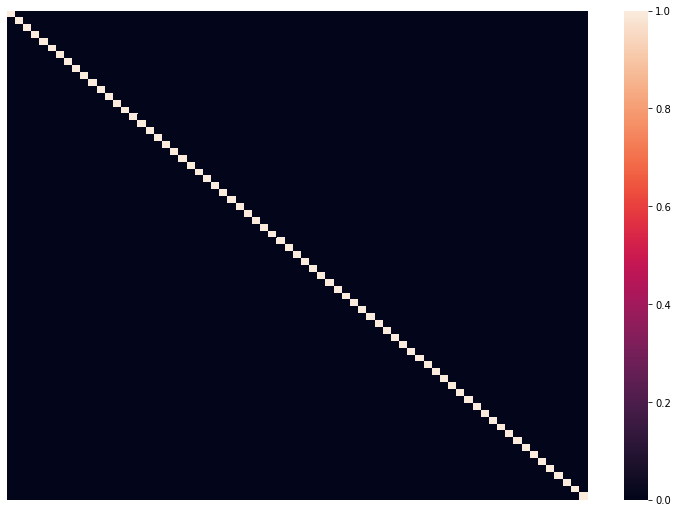

In [59]:
from sklearn.decomposition import PCA
pca = PCA(n_components=71)
principalComponents = pca.fit_transform(X_trainingdata)
X_trainingdata_PCA = pd.DataFrame(data = principalComponents)
X_trainingdata_PCA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(13,9))
a=sns.heatmap(X_trainingdata_PCA.corr(),xticklabels=False, yticklabels=False)

In [24]:
print(np.sum(pca.explained_variance_ratio_))

0.9520798546956848


In [ ]:
y_trainingdata_PCA=pd.DataFrame(data =y_trainingdata.to_numpy()[:,1],columns=['SR-ARE'])
y_trainingdata_PCA

In [26]:
from sklearn.ensemble import AdaBoostClassifier
clf=AdaBoostClassifier()
clf.fit(X_trainingdata,y_trainingdata['SR-ARE'])
cptrain=clf.score(X_trainingdata,y_trainingdata['SR-ARE'])
print('training score adaboost= ',cptrain)
cptest=clf.score(X_test,y_test['SR-ARE'])
print('test score = ',cptest)

training score adaboost=  0.8583269082498073
test score =  0.8509532062391681


In [41]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf):
    clf.fit(X_trainingdata, y_trainingdata['SR-ARE'])
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test['SR-ARE'], y_pred))

LogisticRegression 0.854419410745234
RandomForestClassifier 0.8648180242634316


In [33]:
# ...bagging dessicion
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_trainingdata, y_trainingdata['SR-ARE'])
y_pred = bag_clf.predict(X_test)
print(accuracy_score(y_test['SR-ARE'], y_pred))

0.8440207972270364


In [32]:
# ...PCA of bagging dessicion
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_trainingdata_PCA.to_numpy().astype('float'),np.transpose(y_trainingdata_PCA.to_numpy().astype('int'))[0])
#need xtest PCA
principalComponents = pca.fit_transform(X_test)
X_test_PCA = pd.DataFrame(data = principalComponents)
y_pred = bag_clf.predict(X_test_PCA)
print(accuracy_score(y_test['SR-ARE'], y_pred))


0.8422876949740035


In [34]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_trainingdata, y_trainingdata['SR-ARE'])

y_pred_rf = rnd_clf.predict(X_test)
np.sum(y_pred == y_pred_rf) / len(y_pred)  # almost identical predictions

0.9982668977469671

In [36]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_trainingdata, y_trainingdata['SR-ARE'])
y_pred = bag_clf.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test['SR-ARE'], y_pred))

0.8440207972270364


In [37]:
bag_clf2 = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=1, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf2.fit(X_trainingdata, y_trainingdata['SR-ARE'])
y_pred2 = (bag_clf2).predict(X_test)
print(accuracy_score(y_test['SR-ARE'], y_pred2))

0.8422876949740035


In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver="liblinear", random_state=42) # See the following link for a very good review on the different solvers/methods: https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-defintions
# and see this https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
rnd_clf = RandomForestClassifier(n_estimators=20, random_state=42)
svm_clf = SVC(gamma="auto", random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_trainingdata, y_trainingdata['SR-ARE'])
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test['SR-ARE'], y_pred))

LogisticRegression 0.854419410745234
RandomForestClassifier 0.8648180242634316
SVC 0.8422876949740035
VotingClassifier 0.8526863084922011


In [39]:
log_clf = LogisticRegression(solver="liblinear", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=20, random_state=42)
svm_clf = SVC(gamma="auto", probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(X_trainingdata, y_trainingdata['SR-ARE'])

VotingClassifier(estimators=[('lr',
                              LogisticRegression(random_state=42,
                                                 solver='liblinear')),
                             ('rf',
                              RandomForestClassifier(n_estimators=20,
                                                     random_state=42)),
                             ('svc',
                              SVC(gamma='auto', probability=True,
                                  random_state=42))],
                 voting='soft')

In [ ]:
###### ..     GRID SEARCH CV   .. #####

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
knn = KNeighborsClassifier()
param_grid={'n_neighbors':np.arange(1,100,2),'metric':['euclidean','cosine','manhattan']}
grid=GridSearchCV(knn,param_grid=param_grid,cv=10,scoring='balanced_accuracy',return_train_score=False)
grid.fit(X_trainingdata_PCA.to_numpy().astype('float'),np.transpose(y_trainingdata_PCA.to_numpy().astype('int'))[0])
print("best mean cv score= ",grid.best_score_)
print("best parameters= ",grid.best_params_)

best mean cv score=  0.6640470378287008
best parameters=  {'metric': 'cosine', 'n_neighbors': 1}


In [50]:
X_test_pca=pd.DataFrame(data=pca.transform(X_test))
grid.score(X_test_pca,y_test['SR-ARE'])

0.5543571654682766

In [51]:
y_pred_knn=grid.best_estimator_.predict(X_test_pca)
print(confusion_matrix(y_test['SR-ARE'],np.transpose(np.matrix(y_pred_knn))))

[[416  70]
 [ 68  23]]


In [52]:
knn_cv_results=grid.cv_results_

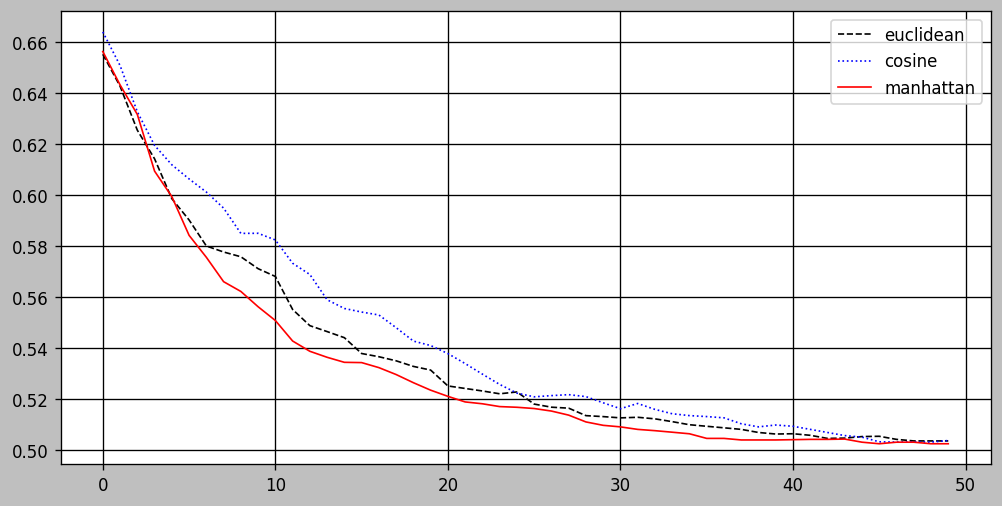

<Figure size 432x288 with 0 Axes>

In [53]:
plt.style.use('grayscale')
plt.figure(figsize=(10,5),dpi=120)
plt.plot(np.arange(0,50,1),knn_cv_results['mean_test_score'][0:50],lw=1,label='euclidean',ls='--')
plt.plot(np.arange(0,50,1),knn_cv_results['mean_test_score'][50:100],lw=1,label='cosine',ls=":",c='blue')
plt.plot(np.arange(0,50,1),knn_cv_results['mean_test_score'][100:150],lw=1,label='manhattan',ls='-',c='red')
plt.legend()
plt.grid()
plt.show()
import matplotlib.pyplot as plt

fig = plt.figure()
fig.canvas.manager.full_screen_toggle() # toggle fullscreen mode
fig.show()

In [54]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
DecisionTree = DecisionTreeClassifier()
param_grid={'criterion':['gini','entropy'],'max_depth':[5,10,15,20,25,30]}
grid=GridSearchCV(DecisionTree,param_grid=param_grid,cv=8,scoring='balanced_accuracy',return_train_score=False)
grid.fit(X_trainingdata_PCA.to_numpy().astype('float'),np.transpose(y_trainingdata_PCA.to_numpy().astype('int'))[0])
print('DecisionTree')
print("best mean cv score= ",grid.best_score_)
print("best parameters= ",grid.best_params_)
y_pred_dt=grid.best_estimator_.predict(X_test_pca)
print(confusion_matrix(y_test['SR-ARE'],np.transpose(np.matrix(y_pred_dt))))
print('test score',grid.score(X_test_pca,y_test['SR-ARE']))

DecisionTree
best mean cv score=  0.6185195808733015
best parameters=  {'criterion': 'gini', 'max_depth': 30}
[[417  69]
 [ 65  26]]
test score 0.5718694885361553


In [55]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_trainingdata, y_trainingdata['SR-ARE'])
y_pred_tree = tree_clf.predict(X_test)
print('DecisionTree',accuracy_score(y_test['SR-ARE'], y_pred_tree))

DecisionTree 0.7989601386481803


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
RFC = RandomForestClassifier()
param_grid={'n_estimators':[300],'criterion':['gini','entropy'],'max_depth':[3,4,5,6], 'max_features':['auto','sqrt','log2']}
grid=GridSearchCV(RFC,param_grid=param_grid,cv=5,scoring='balanced_accuracy',return_train_score=False)
grid.fit(X_trainingdata.to_numpy().astype('float'),y_trainingdata['SR-ARE'])
print("best mean cv score= ",grid.best_score_)
print("best parameters= ",grid.best_params_)

In [56]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
Adabost = AdaBoostClassifier()
param_grid={'n_estimators':np.arange(1,100,5)}
grid=GridSearchCV(Adabost,param_grid=param_grid,cv=10,scoring='balanced_accuracy',return_train_score=False)
grid.fit(X_trainingdata_PCA.to_numpy().astype('float'),(np.transpose(y_trainingdata_PCA.to_numpy().astype('int')))[0])
print("best mean cv score= ",grid.best_score_)
print("best parameters= ",grid.best_params_)



best mean cv score=  0.5937254770114919
best parameters=  {'n_estimators': 91}
